In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets/data.csv')

In [ ]:

df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

droping unwanted columns

In [ ]:
df=df.drop(['Unnamed: 32','id'],axis=1)

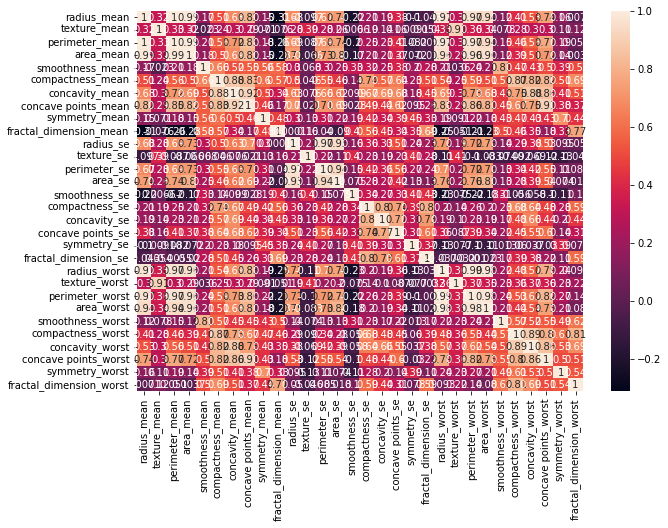

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

converting texts to numerical values

In [ ]:
def diagnosis_val(diagnosis):
  if diagnosis=='M':
    return 1
  else:
    return 0
df['diagnosis']=df['diagnosis'].apply(diagnosis_val)
  

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
cor_diagnosis = abs(df.corr()['diagnosis']) 

cor_diagnosis[cor_diagnosis > 0.7].keys()

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')

In [ ]:
X = df[[ 'radius_mean', 'perimeter_mean', 'area_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst']] .values 

In [ ]:
X

array([[1.799e+01, 1.228e+02, 1.001e+03, ..., 1.846e+02, 2.019e+03,
        2.654e-01],
       [2.057e+01, 1.329e+02, 1.326e+03, ..., 1.588e+02, 1.956e+03,
        1.860e-01],
       [1.969e+01, 1.300e+02, 1.203e+03, ..., 1.525e+02, 1.709e+03,
        2.430e-01],
       ...,
       [1.660e+01, 1.083e+02, 8.581e+02, ..., 1.267e+02, 1.124e+03,
        1.418e-01],
       [2.060e+01, 1.401e+02, 1.265e+03, ..., 1.846e+02, 1.821e+03,
        2.650e-01],
       [7.760e+00, 4.792e+01, 1.810e+02, ..., 5.916e+01, 2.686e+02,
        0.000e+00]])

In [ ]:
Y=np.array(df['diagnosis'])

In [ ]:
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.09706398,  1.26993369,  0.9843749 ,  2.53247522,  1.88668963,
         2.30360062,  2.00123749,  2.29607613],
       [ 1.82982061,  1.68595471,  1.90870825,  0.54814416,  1.80592744,
         1.53512599,  1.89048899,  1.0870843 ],
       [ 1.57988811,  1.56650313,  1.55888363,  2.03723076,  1.51187025,
         1.34747521,  1.45628455,  1.95500035],
       [-0.76890929, -0.59268717, -0.76446379,  1.45170736, -0.28146446,
        -0.2499393 , -0.55002123,  2.17578601],
       [ 1.75029663,  1.77657315,  1.82622928,  1.42849277,  1.29857524,
         1.33853946,  1.22072425,  0.72925926]])

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [ ]:
Knn=KNeighborsClassifier(n_neighbors=5)
model=Knn.fit(xtrain,ytrain)
pred=model.predict(xtest)

In [ ]:
data=np.array([[17.9,122,1001,0.1471,25.3,184.6,2019,0.2654]])
pr=model.predict(data)
pr

array([1])

In [ ]:


print("Accuracy:",metrics.accuracy_score(ytest,pred))

Accuracy: 0.9385964912280702


In [ ]:
import pickle
fil='knn4bcancer.pickle'
pickle.dump(model,open(fil,'wb'))
